# Load Data

Here we load and preprocess data from CSV file

In [1]:
import numpy as np
import pandas as pd
import normalize

df_file_loc = "../data/2015/SWaT_Dataset_Attack_v0.csv"

df = pd.read_csv(df_file_loc)
print(df.shape)
df_total_rows = int(df.shape[0])

# Dataset Start Time and End Time
df_time_start = 0
df_time_end = 0

for index, row in df.iterrows():
    if index == 1:
        timestamp, _ = normalize.date_time(row["Timestamp"])
        print("timestamp_start=%s" %(timestamp))
        df_time_start = np.array(timestamp, dtype=np.datetime64)
        break


names = df.columns.tolist()
df_footer = pd.read_csv(df_file_loc, names=names, skiprows=df_total_rows)
for index, row in df_footer.iterrows():
    timestamp, _ = normalize.date_time(row["Timestamp"])
    print("timestamp_end=%s" %(timestamp))
    df_time_end = np.array(timestamp, dtype=np.datetime64)

df.reset_index()
df.head()

(449919, 53)
timestamp_start=2015-12-28T10:00:01
timestamp_end=2016-01-02T02:59:59


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


## Detect anomalies from input data

We can get the information about attacks from SWaT dataset `data/2015/List_of_attacks_Final.csv. They represent are divided into groups:

- Single stage single point (SSSP)
- Single stage multi point (SSMP)
- Multi stage single point (MSSP)
- Multi stage multi point attacks (MSMP)
 

In [2]:
import load 

attacks_file_loc = "../data/2015/List_of_attacks_Final.csv"
stages, anomalies = load.anomalies(attacks_file_loc)

print("Loaded %d anomalies\n" %(len(anomalies)))



P1 ['MV101', 'P102', 'LIT101', 'P101']
P2 ['AIT202', 'P203', 'P205', 'P201', 'MV201']
P3 ['LIT301', 'DPIT301', 'MV304', 'MV303', 'MV302', 'P302']
P4 ['FIT401', 'UV401', 'LIT401', 'P401', 'AIT402']
P5 ['AIT502', 'P501', 'FIT502']
P6 ['P602']
Loaded 33 anomalies



## Plot all

In [ ]:
import plot
import numpy as np
import filter

time_delta = np.timedelta64(1, "s")
time_start, time_end = filter.get_times(anomalies, None)
time_len = int((time_end - time_start) / time_delta)

x = time_start + np.arange(0, time_len, 1)
idx_start = int((time_start - df_time_start) / time_delta)
idx_end = int((time_end - df_time_start) / time_delta)

obj = {
    "file_loc": "../output/all.png", 
    "df": df, 
    "time_start": time_start, 
    "time_delta": time_delta, 
    "idx_start": idx_start, 
    "idx_end": idx_end,
    "anomalies": anomalies,
    # "title": "All stages together",
    "title": "",
    "x": x
}
plot.process(obj)



## Plot per stage (P1, P2, P3, P4, P5, P6)

Here we plot per stage what is and where happening

['Timestamp', 'Timestamp', 'MV101', 'P102', 'LIT101', 'P101']
(449919, 5)
                Timestamp    LIT101  MV101  P101  P102
0  28/12/2015 10:00:00 AM  522.8467      2     2     1
1  28/12/2015 10:00:01 AM  522.8860      2     2     1
2  28/12/2015 10:00:02 AM  522.8467      2     2     1
3  28/12/2015 10:00:03 AM  522.9645      2     2     1
4  28/12/2015 10:00:04 AM  523.4748      2     2     1


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


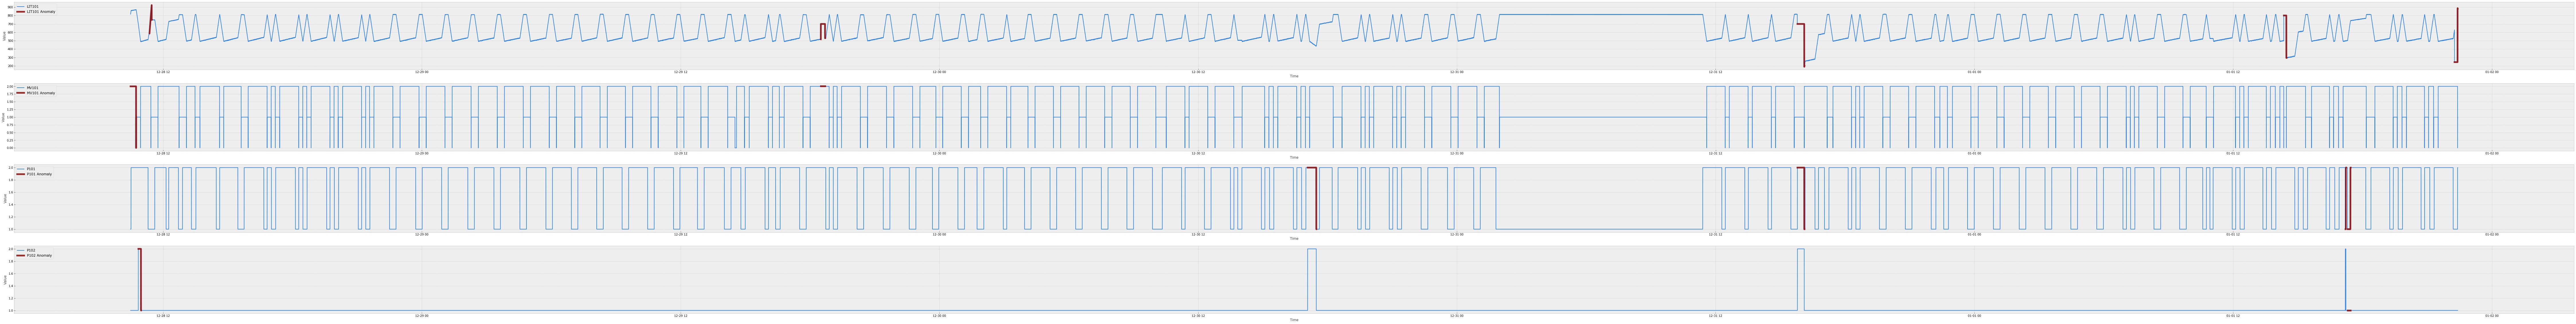

In [4]:
import filter
import plot

stages_for_plotting = [
    "P1",
    "P2",
    "P3",
    "P4",
    "P5",
    "P6",
]

time_delta = np.timedelta64(1, "s")

for stage in stages_for_plotting:
    time_start, time_end = filter.get_times(anomalies, stage)
    time_len = int((time_end - time_start) / time_delta)

    x = time_start + np.arange(0, time_len, 1)
    idx_start = int((time_start - df_time_start) / time_delta)
    idx_end = int((time_end - df_time_start) / time_delta)

    columns = stages[stage]
    df_custom = filter.load_df(df_file_loc, columns)

    obj = {
        "file_loc": "../output/stage_%s.png" %(stage), 
        "df": df_custom, 
        "time_start": time_start, 
        "time_delta": time_delta, 
        "idx_start": idx_start, 
        "idx_end": idx_end,
        "anomalies": anomalies,
        # "title": "Stage %s" %(stage),
        "title": "",
        "x": x
    }
    plot.process(obj)
